In [1]:
# Authentication to Google API
import os
import math
from collections import Counter
from google.cloud import vision
import re

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='vision_key.json'
WORD = re.compile(r"\w+") 

In [2]:
def detect_text(path):
    """Detects text in the file."""

    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # for non-dense text 
    # response = client.text_detection(image=image)
    # for dense text
    response = client.document_text_detection(image=image)
    texts = response.text_annotations
    ocr_text = []

    for text in texts:
        ocr_text.append(f"\r\n{text.description}")

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    return ocr_text 

In [3]:
image_path = "road.jpg"
text = detect_text(image_path)

In [4]:
text[0]

'\r\nIMPORTANCE OF\nROAD SAFETY AWARENESS\nSTOP'

In [5]:
for line in text:
    print(line)


IMPORTANCE OF
ROAD SAFETY AWARENESS
STOP

IMPORTANCE

OF

ROAD

SAFETY

AWARENESS

STOP


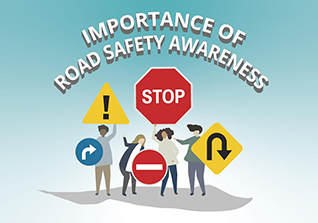

In [6]:
from PIL import Image, ImageDraw
image=Image.open(image_path)
image